In [10]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pickle  # For saving and loading the data
import sdf_helper as sh
import os as os

# Matplotlib formatting
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import ListedColormap, LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
hard_drive = '/volumes/My Passport/MMath Project'
os.chdir(hard_drive)

### Global Matplotlib Formatting

In [35]:
# LaTeX for plot labels
plt.rcParams['text.usetex'] = True

# Specify the LaTeX package for standard math fonts
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


plt.rcParams['xtick.labelsize'] = 20  # Example for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 20 

### Calculate the velocity time stacks for the three simulations

#### $S_L=5.63\times10^3$

In [12]:
simulation = '/volumes/My Passport/MMath Project/sim_800_8'
os.chdir(simulation) 
data_dir = 'Data' 

# Calculate outflow velocities for all time
data = sh.getdata(0,data_dir,verbose=False)
nx, ny = data.Grid_Grid_mid.dims

# Get number of sdf files

N = len(glob.glob1(data_dir,"*.sdf"))

# Loop through files storing times and Vx(y=0)
times = np.zeros(N)
Vx_boundary_low = np.zeros((nx+1,N))
for ind in range(0,N):
    data = sh.getdata(ind,data_dir,verbose=False)
    times[ind] = data.Last_dump_time_requested.data
    Vx_boundary_low[:,ind] = data.Velocity_Vx.data[:,0]

#### $S_L=1.78\times10^4$

In [13]:
simulation = '/volumes/My Passport/MMath Project/sim_800_10'
os.chdir(simulation) 
data_dir = 'Data' 

# Calculate outflow velocities for all time
data = sh.getdata(0,data_dir,verbose=False)
nx, ny = data.Grid_Grid_mid.dims

# Get number of sdf files
N = len(glob.glob1(data_dir,"*.sdf"))
# Loop through files storing times and Vx(y=0)
Vx_boundary_mid = np.zeros((nx+1,N))
for ind in range(0,N):
    data = sh.getdata(ind,data_dir,verbose=False)
    Vx_boundary_mid[:,ind] = data.Velocity_Vx.data[:,0]

#### $S_L=3.16\times10^5$

In [14]:
simulation = '/volumes/My Passport/MMath Project/sim_800_15'
os.chdir(simulation) 
data_dir = 'Data' 

# Calculate outflow velocities for all time
data = sh.getdata(0,data_dir,verbose=False)
nx, ny = data.Grid_Grid_mid.dims

# Get number of sdf files
N = len(glob.glob1(data_dir,"*.sdf"))

# Loop through files storing times and Vx(y=0)
Vx_boundary_high = np.zeros((nx+1,N))
for ind in range(0,N):
    data = sh.getdata(ind,data_dir,verbose=False)
    Vx_boundary_high[:,ind] = data.Velocity_Vx.data[:,0]

### Plot velocity time stacks for the three values of $S_L$

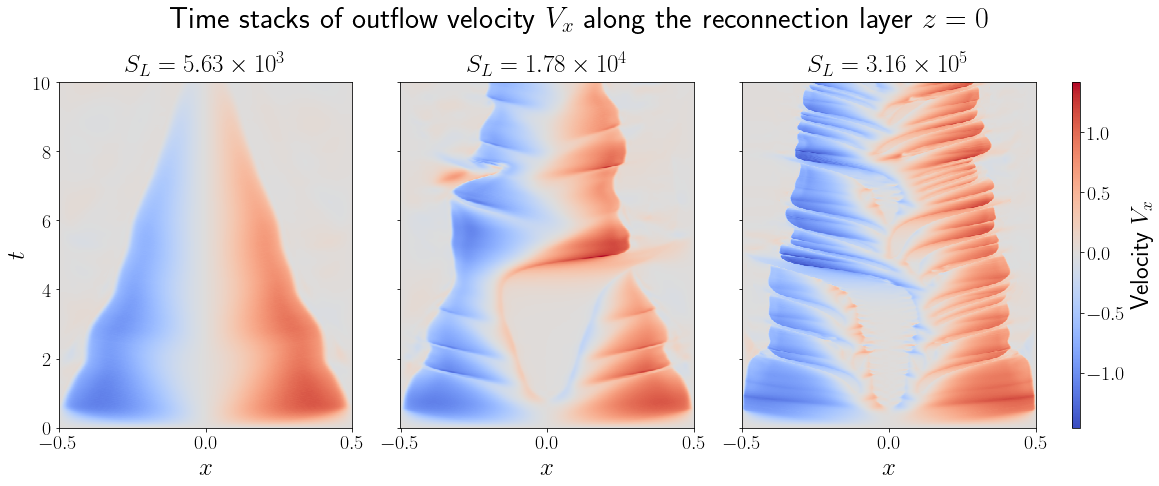

In [62]:
g = data.Grid_Grid 
xb = g.data[0] 
yb = g.data[1] 

fig, axs = plt.subplots(1, 3, layout='constrained', figsize=(16, 6))  # 1 row, 3 cols
X, T = np.meshgrid(xb, times, indexing='ij')




# Plot settings for each subplot - colourbar will be normalised across all time stacks. 
vmin, vmax = min(np.min(Vx_boundary_low), np.min(Vx_boundary_mid), np.min(Vx_boundary_high)), max(np.max(Vx_boundary_low), np.max(Vx_boundary_mid), np.max(Vx_boundary_high))

# Dataset for low boundary
pc = axs[0].pcolormesh(X, T, Vx_boundary_low, cmap='coolwarm', vmin=vmin, vmax=vmax)
axs[0].set_title(r'$S_L=5.63\times10^3$', size=25, pad=10)
axs[0].set_xlabel('$x$', size=25)
axs[0].set_ylabel('$t$', size=25)
axs[0].set_aspect('auto')


# Dataset for mid boundary
axs[1].pcolormesh(X, T, Vx_boundary_mid, cmap='coolwarm', vmin=vmin, vmax=vmax)
axs[1].set_title(r'$S_L=1.78 \times 10^4$', size=25, pad=10)
axs[1].set_xlabel('$x$', size=25)
axs[1].tick_params(left=True, labelleft=False, bottom=True, labelbottom=True)
axs[1].set_aspect('auto')


# Dataset for high boundary
axs[2].pcolormesh(X, T, Vx_boundary_high, cmap='coolwarm', vmin=vmin, vmax=vmax)
axs[2].set_title(r'$S_L=3.16\times10^5$', size=25, pad=10)
axs[2].set_xlabel('$x$', size=25)
axs[2].tick_params(left=True, labelleft=False, bottom=True, labelbottom=True)

axs[2].set_aspect('auto')

# Adding a single colorbar for the entire figure
cbar = fig.colorbar(pc, ax=axs, fraction=0.04, pad=0.02, aspect=40)
cbar.set_label(r'Velocity $V_x$', size=25, font='ariel')

fig.suptitle(r'Time stacks of outflow velocity $V_x$ along the reconnection layer $z=0$', size=30, y=1.1)

#plt.savefig('velocity_time_stacks.png')
plt.show()
